In [1]:
# importing necessary libraries

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn import metrics

df = pd.read_csv('./US_Accidents_Dec21_updated.csv', nrows= 50000) # taken only 50000 out of 2.8 million rows 
                                                                    # to save processing time

In [2]:
df.shape

(50000, 47)

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
datatype_series = df.dtypes
print('Datatype of each column of df- ')
print(datatype_series)

Datatype of each column of df- 
ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Con

In [6]:
# dropping unnecessary features

df.drop(['Weather_Timestamp', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
         'End_Lng', 'Description', 'Zipcode', 'Timezone'], axis=1, inplace=True)

In [7]:
# determining unique values

print('No. of Unique values for each column is mentioned below: ')
for col in df.columns:
    print(f'{col} : {len(df[col].unique())}')

No. of Unique values for each column is mentioned below: 
ID : 50000
Severity : 3
Distance(mi) : 3908
Number : 5478
Street : 8547
Side : 2
City : 3832
County : 968
State : 44
Country : 1
Airport_Code : 1231
Temperature(F) : 604
Wind_Chill(F) : 696
Humidity(%) : 98
Pressure(in) : 240
Visibility(mi) : 40
Wind_Direction : 25
Wind_Speed(mph) : 64
Precipitation(in) : 93
Weather_Condition : 50
Amenity : 2
Bump : 2
Crossing : 2
Give_Way : 2
Junction : 2
No_Exit : 2
Railway : 2
Roundabout : 1
Station : 2
Stop : 2
Traffic_Calming : 2
Traffic_Signal : 2
Turning_Loop : 1
Sunrise_Sunset : 3
Civil_Twilight : 3
Nautical_Twilight : 3
Astronomical_Twilight : 3


In [8]:
df.shape

(50000, 37)

## Finding Columns having only one Unique Values and drop them

In [9]:
redundant_col = list()

for col in df.columns:
    if len(df[col].unique()) == 1:
        redundant_col.append(col)

redundant_col

['Country', 'Roundabout', 'Turning_Loop']

In [10]:
df.shape

(50000, 37)

In [11]:
df.drop(redundant_col, axis=1, inplace= True)
df.shape

(50000, 34)

## Structural Error detection and removal

### For Wind_Direction Column

In [12]:
df.Wind_Direction.unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [13]:
df.Wind_Direction.value_counts()

Calm        6309
West        4921
South       4493
North       3927
WNW         2956
WSW         2691
SSE         2672
SSW         2619
NW          2509
SW          2472
NNW         2124
East        2005
SE          1932
Variable    1839
ESE         1692
ENE         1427
NNE         1381
NE          1324
CALM          88
S             51
VAR           38
W             30
E             18
N             15
Name: Wind_Direction, dtype: int64

In [14]:
# merging nearly similar values to reduce the no. of categories to avoid Curse of Dimensionalty 

df.Wind_Direction.replace(to_replace=['WNW','W','WSW'], value= 'West', inplace=True)
df.Wind_Direction.replace(to_replace=['ESE','E','ENE'], value= 'East', inplace=True)
df.Wind_Direction.replace(to_replace=['NNW','N','NNE'], value= 'North', inplace=True)
df.Wind_Direction.replace(to_replace=['SSW','S','SSE'], value= 'South', inplace=True)
df.Wind_Direction.replace(to_replace=['CALM'], value= 'Calm', inplace=True)
df.Wind_Direction.replace(to_replace=['VAR'], value= 'Variable', inplace=True)

In [15]:
df.Wind_Direction.value_counts()

West        10598
South        9835
North        7447
Calm         6397
East         5142
NW           2509
SW           2472
SE           1932
Variable     1877
NE           1324
Name: Wind_Direction, dtype: int64

### For Weather_Condition Column

In [16]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix'], dtype=object)

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

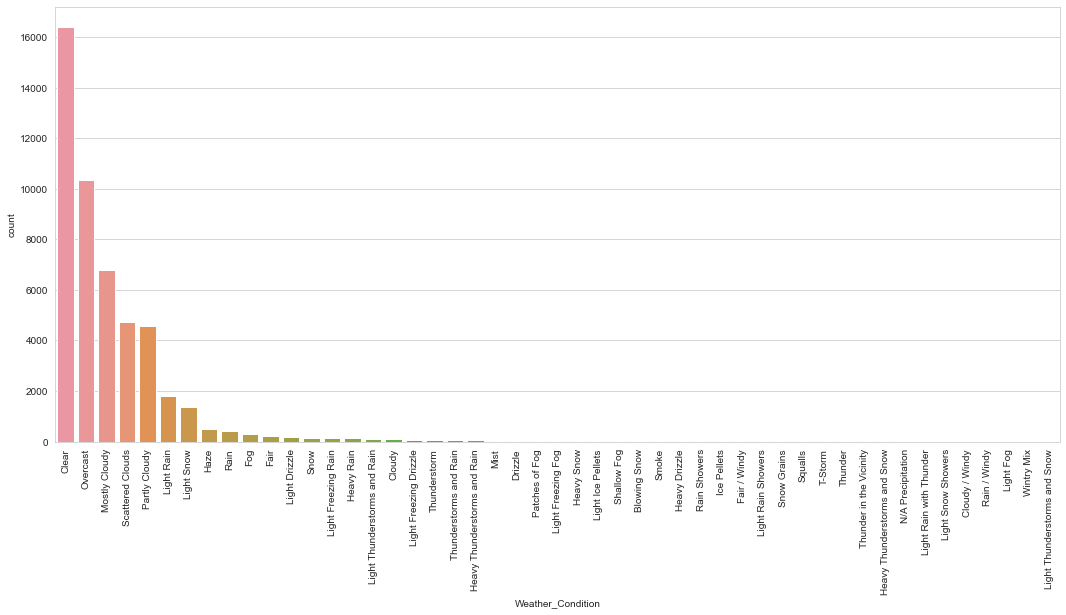

In [18]:
plt.figure(figsize=(18,8))
sns.set_style('whitegrid')
sns.countplot(x='Weather_Condition', data= df, order= df['Weather_Condition'].value_counts().index)
# plt.text()
plt.xticks(rotation=90)
plt.xlabel('Weather_Condition', fontsize=10)
plt.ylabel('count', fontsize=10)

- Replace the values with less count to 'others'

In [19]:
a = df['Weather_Condition'].value_counts()
m = df['Weather_Condition'].isin(a.index[a < 1000])
df.loc[m, 'Weather_Condition'] = 'Other'

In [20]:
df['Weather_Condition'].value_counts()

Clear               16388
Overcast            10337
Mostly Cloudy        6773
Scattered Clouds     4715
Partly Cloudy        4586
Other                2633
Light Rain           1799
Light Snow           1358
Name: Weather_Condition, dtype: int64

## Fixing Unwanted Outliers

In [21]:
def detect_outliers(df, col):
    Q1 = np.nanpercentile(df[col], 25, interpolation= 'midpoint')
    Q3 = np.nanpercentile(df[col], 75, interpolation= 'midpoint')
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return ls

In [22]:
# getting a feature list of float64 data type

features_lst = list()
for col in df.columns:
    if df[col].dtype == 'float64':
        features_lst.append(col)

features_lst            

['Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [23]:
# create an empty list to store the output indices from multiple columns

index_lst = []
for feature in features_lst:
    index_lst.extend(detect_outliers(df, feature))

len(set(index_lst))

17669

In [24]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [25]:
print(df.shape)
df_new = remove(df, index_lst)

(50000, 34)


In [26]:
print(df_new.shape)

(32331, 34)


<AxesSubplot:xlabel='Wind_Direction', ylabel='Wind_Speed(mph)'>

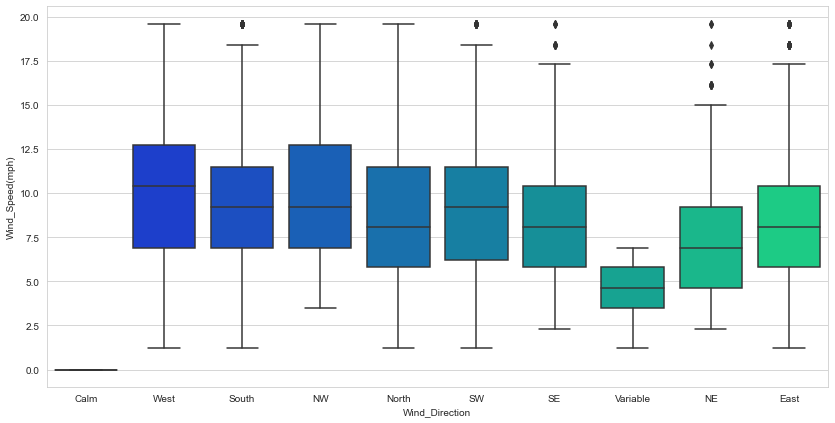

In [27]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Wind_Direction', y='Wind_Speed(mph)', data= df_new, palette= 'winter')

In [28]:
df_new.drop(['County', 'State'], axis=1, inplace= True) # dropping country and state as it depends on the city values

## Missing Values Removal

<AxesSubplot:>

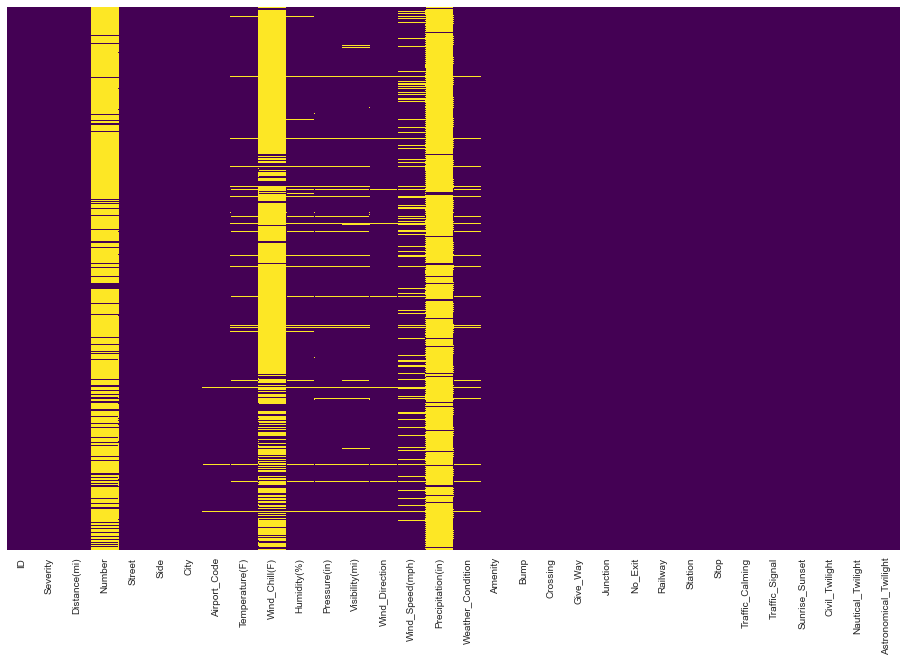

In [29]:
# plot a heatmap to visualize the missing values 

plt.figure(figsize=(16,10))
sns.heatmap(df_new.isnull(), yticklabels= False, cbar=False, cmap='viridis')

Here yellow lines in a column are missing values, which we need to impute

In [30]:
# quantitatively determining the no. of missing valeus

for col in df_new.columns:
    total_na = df_new[col].isna().sum()
    if total_na != 0:
        print(f'{col}: {total_na}')

Number: 26790
Airport_Code: 40
Temperature(F): 1078
Wind_Chill(F): 26003
Humidity(%): 1102
Pressure(in): 1037
Visibility(mi): 1289
Wind_Direction: 403
Wind_Speed(mph): 4996
Precipitation(in): 30980
Weather_Condition: 1192


In [31]:
df_new.dropna(subset=['Weather_Condition'], axis=0, inplace= True) 

In [32]:
df_new.shape

(31139, 32)

### Imputing Humidity

<AxesSubplot:xlabel='Weather_Condition', ylabel='Humidity(%)'>

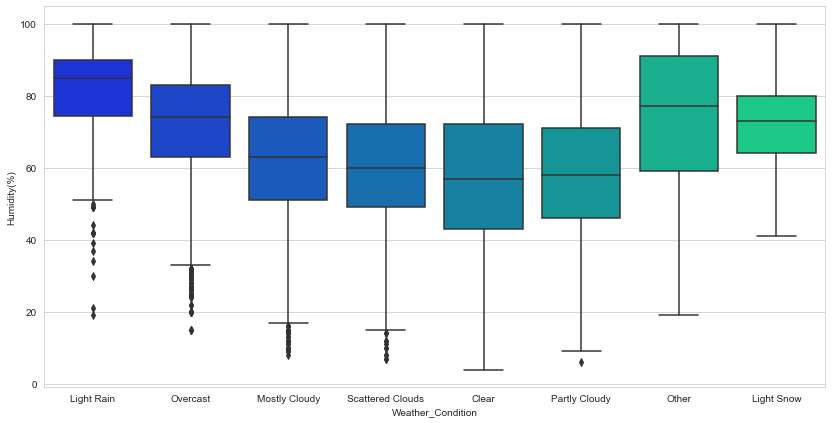

In [33]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Weather_Condition', y='Humidity(%)', data= df_new, palette= 'winter')

In [34]:
def impute_humidity(cols):
    Humidity = cols[0]
    Weather_Cond = cols[1]
    
    if pd.isnull(Humidity):
        
        if Weather_Cond == 'Light Rain':
            return 85.
        
        elif Weather_Cond == 'Overcast':
            return 75.
        
        elif Weather_Cond == 'Mostly Cloudy':
            return 64.
        
        elif Weather_Cond == 'Scattered Clouds':
            return 60.
        
        elif Weather_Cond == 'Partly Cloudy':
            return 58.
        
        elif Weather_Cond == 'Clear':
            return 56.
        
        elif Weather_Cond == 'Light Snow':
            return 72.
        
        else:
            return 77.
        
    else:
        return Humidity

In [35]:
df_new['Humidity(%)'] = df_new[['Humidity(%)', 'Weather_Condition']].apply(impute_humidity, axis=1)

### 'Wind_Chill' column

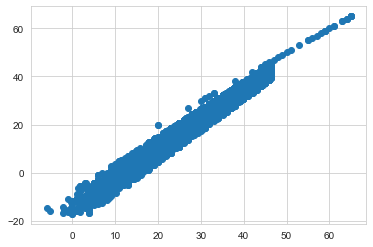

In [36]:
plt.scatter(x=df_new['Temperature(F)'], y= df_new['Wind_Chill(F)'])

In [37]:
df_new['Temperature(F)'].corr(df_new['Wind_Chill(F)'])

0.9864861796850944

In [38]:
df_new.drop(['Wind_Chill(F)'], axis=1, inplace= True) #drop this column as it has 98.7% correlated with Temperature column

### Dealing with 'Number' column

In [39]:
missing_percent_in_Number = df_new['Number'].isnull().sum() / df_new.shape[0] * 100 
print(round(missing_percent_in_Number, 2),'% data is missing in the Number Column')

82.6 % data is missing in the Number Column


In [40]:
df_new.drop(['Number'], axis=1, inplace= True) # drop this column as it has high percentage of missing values

### Imputing Temperature

<AxesSubplot:xlabel='Weather_Condition', ylabel='Temperature(F)'>

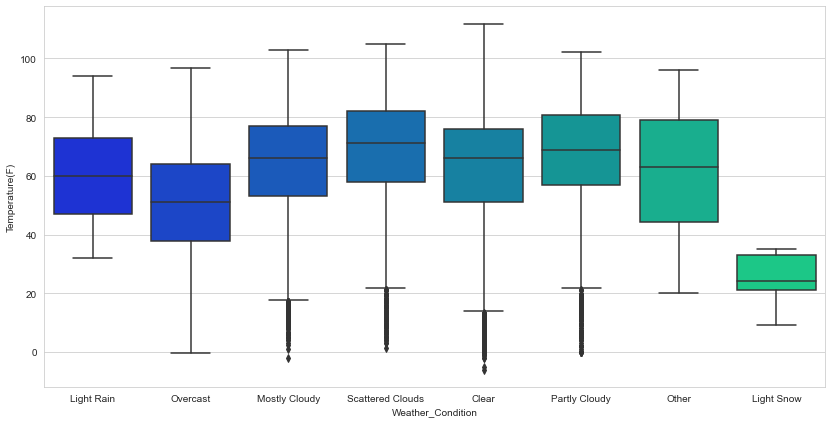

In [41]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Weather_Condition', y='Temperature(F)', data= df_new, palette= 'winter')

In [42]:
def impute_temp(cols):
    Temp = cols[0]
    Weather_Cond = cols[1]
    
    if pd.isnull(Temp):
        
        if Weather_Cond == 'Light Rain':
            return 60.
        
        elif Weather_Cond == 'Overcast':
            return 51.
        
        elif Weather_Cond == 'Mostly Cloudy':
            return 67.
        
        elif Weather_Cond == 'Scattered Clouds':
            return 71.
        
        elif Weather_Cond == 'Partly Cloudy':
            return 67.
        
        elif Weather_Cond == 'Clear':
            return 65.
        
        elif Weather_Cond == 'Light Snow':
            return 25.
        
        elif Weather_Cond == 'Other':
            return 63.
        
    else:
        return Temp

In [43]:
df_new['Temperature(F)'] = df_new[['Temperature(F)', 'Weather_Condition']].apply(impute_temp, axis=1)

In [44]:
df_new['Temperature(F)'].isna().sum() # just checking the na values after imputing

0

### Dealing with 'Visibility' column

<AxesSubplot:xlabel='Weather_Condition', ylabel='Visibility(mi)'>

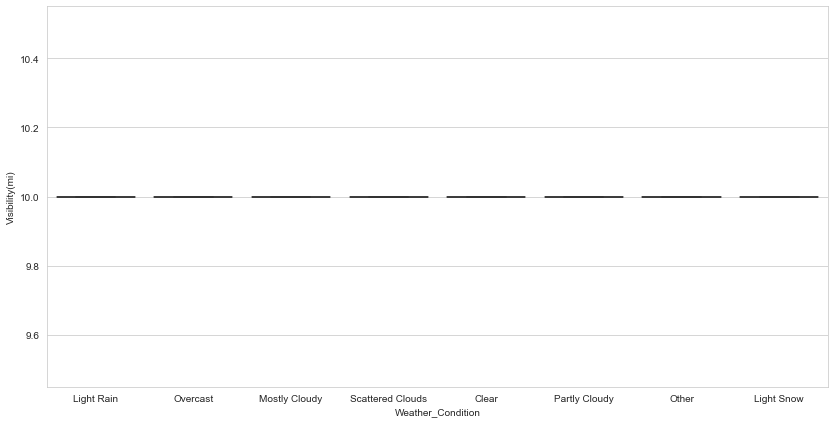

In [45]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Weather_Condition', y='Visibility(mi)', data= df_new, palette= 'winter')

- this box plot looks strange. Let's cheeck the column statistics of Visibility

In [46]:
df_new['Visibility(mi)'].describe()

count    30972.0
mean        10.0
std          0.0
min         10.0
25%         10.0
50%         10.0
75%         10.0
max         10.0
Name: Visibility(mi), dtype: float64

<AxesSubplot:>

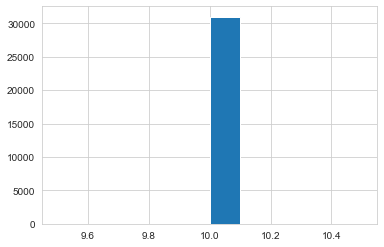

In [47]:
df_new['Visibility(mi)'].hist()

- We get to know that all the values of visibilty is same ie 10 miles which is equal to 16 km roughy which is enough to prevent collision with other vehicles. So,  let's drop it

In [48]:
df_new.drop(['Visibility(mi)'], axis=1, inplace= True)

### Dealing with 'Precipitation' column

In [49]:
missing_percent_in_Number = df_new['Precipitation(in)'].isnull().sum() / df_new.shape[0] * 100 
print(round(missing_percent_in_Number, 2),'% data is missing in the Number Column')

95.7 % data is missing in the Number Column


- We can't impute so much missing values

In [50]:
df_new.drop(['Precipitation(in)'], axis=1, inplace= True)

### Dealing with 'Wind_Speed' column

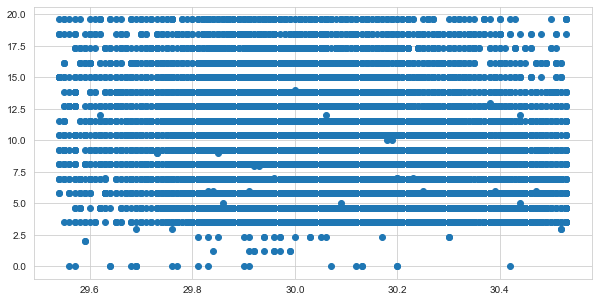

In [51]:
# let's see the variation of pressure with wind_speed

plt.figure(figsize=(10,5))

plt.scatter(x= df_new['Pressure(in)'], y= df_new['Wind_Speed(mph)'])

In [52]:
df_new['Pressure(in)'].corr(df_new['Wind_Speed(mph)'])

-0.1214686522577567

- too low correlation 

<AxesSubplot:>

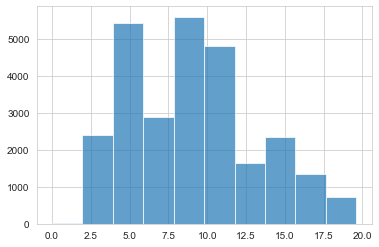

In [53]:
df_new['Wind_Speed(mph)'].hist(bins=10, alpha=0.7)

- follows a Gaussian distribution

In [54]:
df_new['Wind_Speed(mph)'].describe()

count    27248.000000
mean         9.116776
std          3.970789
min          0.000000
25%          5.800000
50%          8.100000
75%         11.500000
max         19.600000
Name: Wind_Speed(mph), dtype: float64

In [55]:
df_new['Wind_Speed(mph)'].fillna(df_new['Wind_Speed(mph)'].mean(), inplace = True)

### Filling na values of 'Wind_Direction'

In [56]:
df_new['Wind_Direction'].fillna(df_new['Wind_Direction'].mode()[0], inplace = True)

### Filling na values of 'Pressure' column

In [57]:
df_new['Pressure(in)'].describe()

count    31090.000000
mean        30.044668
std          0.183390
min         29.540000
25%         29.920000
50%         30.020000
75%         30.150000
max         30.530000
Name: Pressure(in), dtype: float64

In [58]:
df_new['Pressure(in)'].fillna(df_new['Pressure(in)'].mean(), inplace = True)

### Checking Heatmap again for any Missing values

<AxesSubplot:>

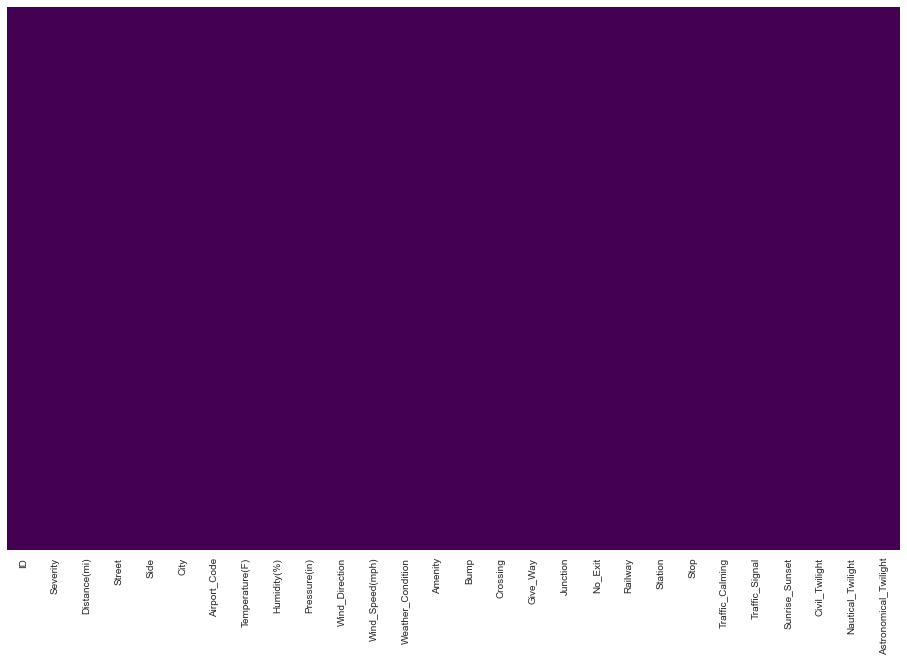

In [59]:
plt.figure(figsize=(14,7))
sns.heatmap(df_new.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [60]:
for col in df_new.columns:
    total_na = df_new[col].isna().sum()
    if total_na != 0:
        print(f'{col}: {total_na}')
else:
    print('No missing values present!')

No missing values present!


In [61]:
df_new.shape

(31139, 28)

In [62]:
df_new.columns

Index(['ID', 'Severity', 'Distance(mi)', 'Street', 'Side', 'City',
       'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Remove redundant column 'ID'

In [63]:
len(df_new['ID'].unique())

31139

In [64]:
df_new.drop(['ID'], axis=1, inplace= True) # all values are unique. Hence, not helpful in classification

## One-hot Encoding

### For 'Street' column

In [65]:
len(df_new['Street'].unique())

6215

- too much uniques values are present

In [66]:
# getting top 10 categories of Street column

df_new['Street'].value_counts().sort_values(ascending=False).head(10)

I-95 N             435
I-45 N             410
I-10 W             407
San Diego Fwy S    332
I-94 W             317
I-5 N              315
I-95 S             306
I-10 E             290
US-101 N           272
I-80 W             272
Name: Street, dtype: int64

In [67]:
# storing index of top 10 street categories

top_10_streets = [x for x in df_new.Street.value_counts().sort_values(ascending=False).head(10).index] 
# top_10

In [68]:
def one_hot_top_x(df, col, top_x_labels):
    
    for label in top_x_labels:
        df[col + '_' + label] = np.where(df_new[col]==label,1,0)

In [69]:
one_hot_top_x(df= df_new, col= 'Street', top_x_labels= top_10_streets)

- Similarly, doing for other columns which have high number of unique values

### For 'City' column

In [70]:
top_10_city = [x for x in df_new.Street.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(df= df_new, col= 'City', top_x_labels= top_10_city)

### For 'Airport_Code' column

In [71]:
top_5_airports = [x for x in df_new.Airport_Code.value_counts().sort_values(ascending=False).head(5).index]

one_hot_top_x(df= df_new, col= 'Airport_Code', top_x_labels= top_5_airports)

### For 'Wind_Direction' column

In [72]:
top_9_WD = [x for x in df_new.Wind_Direction.value_counts().sort_values(ascending=False).head(9).index]

one_hot_top_x(df= df_new, col= 'Wind_Direction', top_x_labels= top_9_WD)

### For 'Weather_Condition'

In [73]:
top_7_WD = [x for x in df_new.Wind_Direction.value_counts().sort_values(ascending=False).head(7).index]

one_hot_top_x(df= df_new, col= 'Weather_Condition', top_x_labels= top_7_WD)

In [74]:
df_new.shape

(31139, 68)

In [75]:
df_new.columns

Index(['Severity', 'Distance(mi)', 'Street', 'Side', 'City', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Street_I-95 N',
       'Street_I-45 N', 'Street_I-10 W', 'Street_San Diego Fwy S',
       'Street_I-94 W', 'Street_I-5 N', 'Street_I-95 S', 'Street_I-10 E',
       'Street_US-101 N', 'Street_I-80 W', 'City_I-95 N', 'City_I-45 N',
       'City_I-10 W', 'City_San Diego Fwy S', 'City_I-94 W', 'City_I-5 N',
       'City_I-95 S', 'City_I-10 E', 'City_US-101 N', 'City_I-80 W',
       'Airport_Code_KMCJ', 'Airport_Code_KDAL', 'Airport_Code_KCQT',
       'Airport_Code_KMKC', 'Airport_Code_KRBD', 'Wind_Direction_West',
       'Wind_Direction_South', 'Wind_Direction_No

In [76]:
df_ohe = df_new 
categorical_columns = ['Amenity', 'Bump', 'Crossing','Side',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df_new[col], prefix= col, drop_first=True)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [77]:
df_ohe.shape

(31139, 68)

In [78]:
df_ohe.columns

Index(['Severity', 'Distance(mi)', 'Street', 'City', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Street_I-95 N',
       'Street_I-45 N', 'Street_I-10 W', 'Street_San Diego Fwy S',
       'Street_I-94 W', 'Street_I-5 N', 'Street_I-95 S', 'Street_I-10 E',
       'Street_US-101 N', 'Street_I-80 W', 'City_I-95 N', 'City_I-45 N',
       'City_I-10 W', 'City_San Diego Fwy S', 'City_I-94 W', 'City_I-5 N',
       'City_I-95 S', 'City_I-10 E', 'City_US-101 N', 'City_I-80 W',
       'Airport_Code_KMCJ', 'Airport_Code_KDAL', 'Airport_Code_KCQT',
       'Airport_Code_KMKC', 'Airport_Code_KRBD', 'Wind_Direction_West',
       'Wind_Direction_South', 'Wind_Direction_North', 'Wind_Direction_Calm',
       'Wind_Direction_East', 'Wind_Direction_NW', 'Wind_Direction_SW',
       'Wind_Direction_Variable', 'Wind_Direction_SE',
       'Weather_Condition_West', 'Weather_Condition_South',
       'Weather_Condition_No

In [79]:
df_ohe.drop(['Street', 'City', 'Airport_Code', 'Weather_Condition','Wind_Direction'], axis=1, inplace=True)

In [80]:
df_ohe.shape

(31139, 63)

In [81]:
df_ohe

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Street_I-95 N,Street_I-45 N,Street_I-10 W,Street_San Diego Fwy S,...,No_Exit_True,Railway_True,Station_True,Stop_True,Traffic_Calming_True,Traffic_Signal_True,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
1,2,0.747,36.9,91.0,29.68,9.116776,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,2,0.055,36.0,97.0,29.70,9.116776,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,2,0.123,39.0,55.0,29.65,9.116776,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,3,0.500,37.0,93.0,29.69,10.400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1.427,35.6,100.0,29.66,8.100000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2,0.232,60.8,82.0,30.16,9.116776,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
49990,4,1.049,77.0,90.0,30.00,12.700000,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
49992,3,0.958,60.1,80.0,30.16,9.116776,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
49994,2,0.642,46.4,93.0,30.10,3.500000,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [82]:
datatype_series = df_ohe.dtypes
print('Datatype of each column of df- ')
print(datatype_series)

Datatype of each column of df- 
Severity                         int64
Distance(mi)                   float64
Temperature(F)                 float64
Humidity(%)                    float64
Pressure(in)                   float64
                                ...   
Traffic_Signal_True              uint8
Sunrise_Sunset_Night             uint8
Civil_Twilight_Night             uint8
Nautical_Twilight_Night          uint8
Astronomical_Twilight_Night      uint8
Length: 63, dtype: object


## Modelling

### 1. Using Decision Tree

In [83]:
Y_DT = df_ohe['Severity']
X_DT = df_ohe.copy()
X_DT = X_DT.drop('Severity', axis =1)

In [84]:
# Printing the dataswet shape
print ("Dataset Length: ", len(X_DT))
print ("Dataset Shape: ", X_DT.shape)
      
# Printing the dataset obseravtions
print ("Dataset: ",X_DT.head())
    

Dataset Length:  31139
Dataset Shape:  (31139, 62)
Dataset:     Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  Wind_Speed(mph)  \
1         0.747            36.9         91.0         29.68         9.116776   
2         0.055            36.0         97.0         29.70         9.116776   
3         0.123            39.0         55.0         29.65         9.116776   
4         0.500            37.0         93.0         29.69        10.400000   
5         1.427            35.6        100.0         29.66         8.100000   

   Street_I-95 N  Street_I-45 N  Street_I-10 W  Street_San Diego Fwy S  \
1              0              0              0                       0   
2              0              0              0                       0   
3              0              0              0                       0   
4              0              0              0                       0   
5              0              0              0                       0   

   Street_I-94 W  .

In [85]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_DT ,Y_DT , test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (24911, 62)
Testing split input-  (6228, 62)


In [86]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [87]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           2       0.79      0.77      0.78      4513
           3       0.31      0.32      0.32      1275
           4       0.35      0.39      0.37       440

    accuracy                           0.65      6228
   macro avg       0.48      0.49      0.49      6228
weighted avg       0.66      0.65      0.65      6228



Text(0.5, 1.0, 'Accuracy Score: 0.6485228002569043')

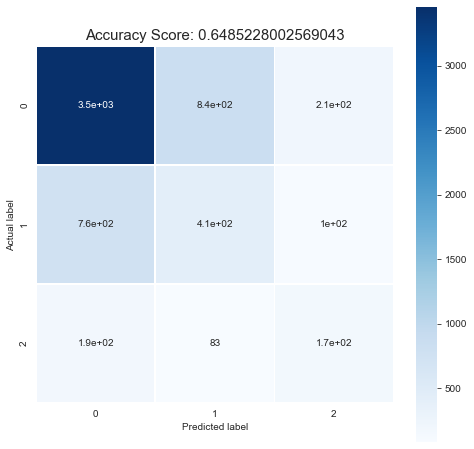

In [88]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

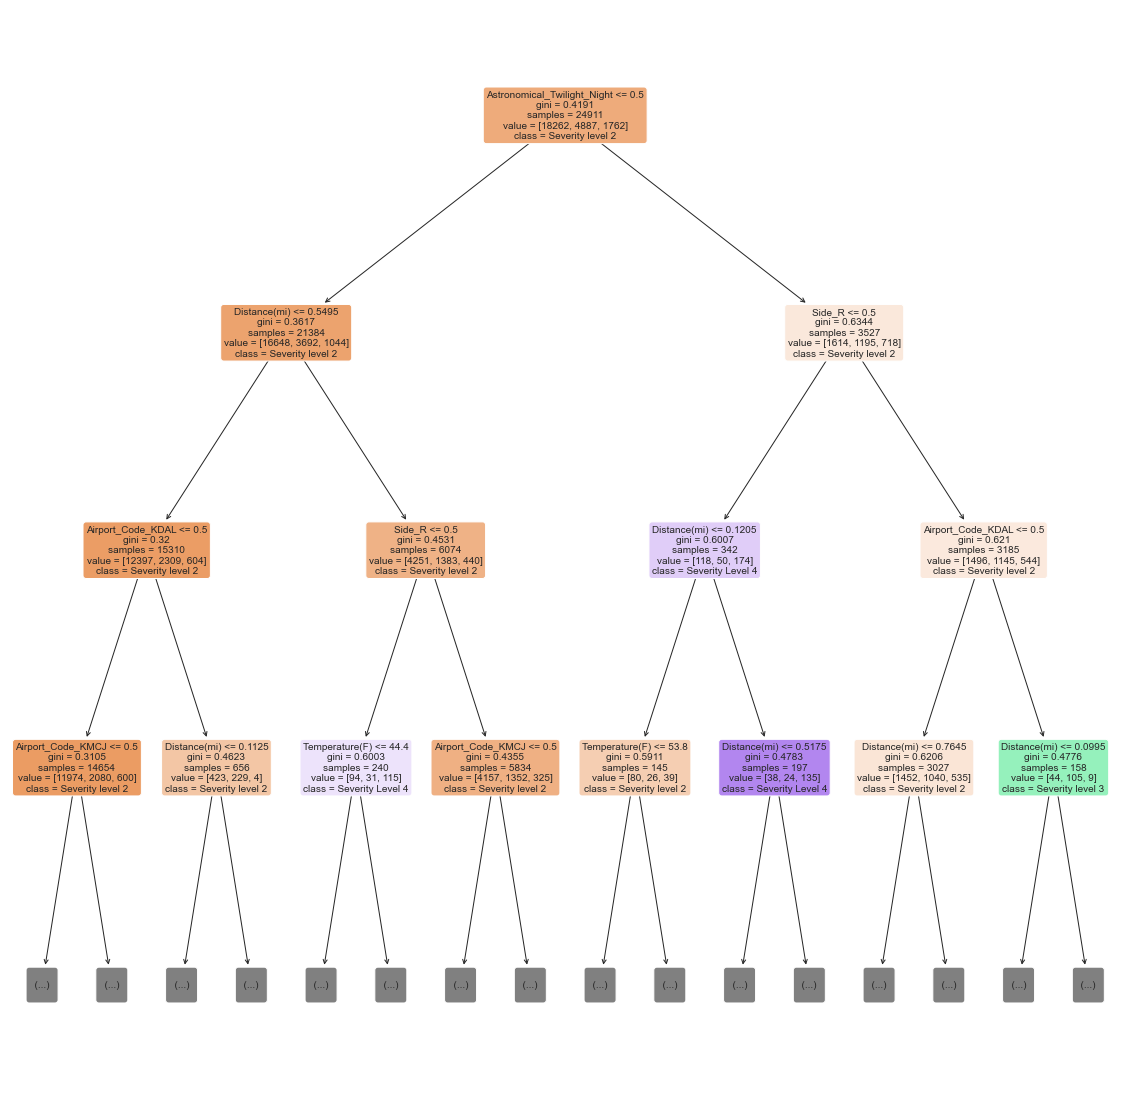

In [89]:
# Visualising the graph without the use of graph
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X_DT.columns, class_names =["Severity level 2", "Severity level 3", "Severity Level 4"] , filled = True , precision = 4, rounded = True,max_depth=3, fontsize = 10)

Overfitting is one of the key challenges in a tree-based algorithm. If no limit is set, it will give 100% fitting, because, in the worst-case scenario, it will end up making a leaf node for each observation. Hence we need to take some precautions to avoid overfitting. It is mostly done in two ways:

1.Setting constraints on tree size (Depth of tree , Minimum number of samples for a node , Maximum number of leafnodes etc )
2.Tree pruning

### Optimizing the Decision tree by setting constraints

In [90]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [91]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [92]:
clf_gini = train_using_gini(X_train, X_test, y_train)


print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


Results Using Gini Index:
Predicted values:
[2 2 2 ... 2 2 4]
Confusion Matrix:  [[4478   12   23]
 [1230   28   17]
 [ 381    4   55]]
Accuracy :  73.23378291586384
Report :                precision    recall  f1-score   support

           2       0.74      0.99      0.84      4513
           3       0.64      0.02      0.04      1275
           4       0.58      0.12      0.21       440

    accuracy                           0.73      6228
   macro avg       0.65      0.38      0.36      6228
weighted avg       0.70      0.73      0.64      6228



Hence we can see that by setting a limit on tree depth of 3 , Accuracy improved from 65.29 to 73.23

### Predict the Test set results with criterion entropy

In [93]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [94]:
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

print("Results Using Entropy:")

# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[2 2 2 ... 2 2 2]
Confusion Matrix:  [[4458   46    9]
 [1199   69    7]
 [ 379   35   26]]
Accuracy :  73.1053307642903
Report :                precision    recall  f1-score   support

           2       0.74      0.99      0.85      4513
           3       0.46      0.05      0.10      1275
           4       0.62      0.06      0.11       440

    accuracy                           0.73      6228
   macro avg       0.61      0.37      0.35      6228
weighted avg       0.67      0.73      0.64      6228



### 2. Random Forest

In [100]:
Y_RF = df_ohe['Severity']
X_RF = df_ohe.copy()
X_RF = X_RF.drop('Severity', axis =1)

In [102]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200)

# Splitting the data - 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_DT ,Y_DT , test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (24911, 62)
Testing split input-  (6228, 62)


In [103]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [107]:
Y_predict = random_forest.predict(X_test)

RF_score = random_forest.score(X_test,Y_test)
rounded_RF_score = round(RF_score * 100, 2)

In [108]:
sk_report = classification_report(
    digits=6,
    y_true=Y_test, 
    y_pred =Y_predict)
print("Accuracy" , rounded_RF_score)
print(sk_report)
pd.crosstab(Y_test, Y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 75.59
              precision    recall  f1-score   support

           2   0.771134  0.960115  0.855310      4513
           3   0.562353  0.187451  0.281176      1275
           4   0.739130  0.309091  0.435897       440

    accuracy                       0.755941      6228
   macro avg   0.690872  0.485552  0.524128      6228
weighted avg   0.726131  0.755941  0.708142      6228

done


In [109]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Scaling the data

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy = True)
Unscaled_X = scaler.fit_transform(X_train)

X_scaled = pd.DataFrame(Unscaled_X)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.998034,0.745837,0.333333,0.363636,0.765306,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.125164,0.028046,0.822917,0.858586,0.234694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.268676,0.492550,0.572917,0.494949,0.469388,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315858,0.588081,0.718750,0.292929,0.469388,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.355832,0.711656,0.333333,0.383838,0.586735,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24906,0.062254,0.457493,0.458333,0.616162,0.765306,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24907,0.273919,0.546012,0.552083,0.363636,0.234694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24908,0.051114,0.571429,0.406250,0.696970,0.586735,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24909,0.754915,0.567923,0.572917,0.535354,0.234694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy = True)
Unscaled_X_test = scaler.fit_transform(X_test)

X_test_scaled = pd.DataFrame(Unscaled_X_test)
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.359764,0.686620,0.691489,0.757576,0.704082,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.259502,0.624120,0.436170,0.757576,0.352041,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.290957,0.326585,0.734043,0.878788,0.413265,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365007,0.825704,0.638298,0.434343,0.295918,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.522936,0.245599,0.234043,0.575758,0.938776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,0.200524,0.124120,0.585106,0.616162,0.530612,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6224,0.256225,0.746479,0.351064,0.444444,0.469388,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6225,0.214286,0.465669,0.691489,0.868687,0.413265,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6226,0.854522,0.255282,0.574468,0.545455,0.882653,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Logistic Regression

In [125]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_scaled, Y_train)
Y_pred = lr.predict(X_test_scaled)
sk_report = classification_report(
    digits=6,
    y_true=Y_test, 
    y_pred=Y_pred)
print("Accuracy", round(accuracy_score(Y_pred, Y_test)*100,2))
print(sk_report)
pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 73.43
              precision    recall  f1-score   support

           2   0.745393  0.976955  0.845608      4513
           3   0.530516  0.088627  0.151882      1275
           4   0.510000  0.115909  0.188889       440

    accuracy                       0.734265      6228
   macro avg   0.595303  0.393831  0.395460      6228
weighted avg   0.684773  0.734265  0.657192      6228



C:\Users\Uddeshya Sahu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,2,3,4,All
Actual,,,,
2,4409,79,25,4513
3,1138,113,24,1275
4,368,21,51,440
All,5915,213,100,6228


### 4. SVM

In [126]:
from sklearn.svm import SVC

In [127]:
svc_model = SVC(C= 12, gamma=10, kernel= 'rbf')

In [129]:
svc_model.fit(X_scaled, Y_train)

SVC(C=12, gamma=10)

In [130]:
svc_model.score(X_test_scaled, Y_test)

0.6981374438021837

#### Hyperparamenter Tuning for SVM

In [131]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid = {'C': [1, 20],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_scaled, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time= 1.0min
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time= 1.1min
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time= 1.1min
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time= 1.0min
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=  55.7s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  34.6s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  34.7s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  34.1s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  34.1s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  33.7s
[CV 1/5] END ......................C=20, gamma=1, kernel=rbf; total time= 2.1min
[CV 2/5] END ......................C=20, gamma=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 20], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [135]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=20, gamma=0.1)


In [136]:
grid_predictions = grid.predict(X_test_scaled)

# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           2       0.74      0.98      0.84      4513
           3       0.51      0.07      0.12      1275
           4       0.59      0.13      0.22       440

    accuracy                           0.73      6228
   macro avg       0.61      0.39      0.39      6228
weighted avg       0.68      0.73      0.65      6228



- After comparing accuracy of all the classifiers, we find that all the classifier have almost same accuracy but Random Forest has the highest accuracy of 75.59% 
